<a href="https://colab.research.google.com/github/lucifernob/Exploratory-Data-Analysis-of-Car-Features/blob/master/Project_car_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Exploratory Data Analysis of Car Features**

---
#Table of Contents

[Problem statement](#scrollTo=cLYy6-OZaxjA)

1. [Importing libraries](#scrollTo=txOHBj0enPui)
      *   Loading the data file
      *   Loading the data into the datafiles
      *   Checking the types of data and basic summary stats
2. [Dropping irrelevant data](#scrollTo=DX1l2uVysU_Z)
3. [Renamming the columns](#scrollTo=N7gAUtMDwuDe)
4. [Removing duplicate data](##scrollTo=Uvz31baGA1a2)
      *   Dropping duplicate rows
      *   Dropping null/missing values
5. [Detecting outliers](#scrollTo=C5qMTUprWnoh)
6. [Top car brands and average price](#scrollTo=uRU42vmga-26)

      *   Top 10 car brands
      *   Average price of car
      *   Top 5 highest selling car
      *   Top 5 least popular cars


7. [Correlation matrix](##scrollTo=uKC0lEmbFE8i)
8. [Plotting different graphs & Performing EDA](#scrollTo=-eOQrWVu2byn)
      *   Scatter plots
      *   Heat Map
      *   Most sold car segment
      *   Forming new group "price_group"
      *   Multivariate Graphs
      *   Pair Plot
9. [Basic Machine learning model](##scrollTo=mYmYeeKC2mKV)
      *   Splitting the dataset
      *   ML with linear regression
10. [Spot checking algorithms](#scrollTo=g03tzB_J7j8s)
      *   Polynomial regression
      *   SVR regression
      *   Random Forest

[Downloading the output graphs we made](#scrollTo=Wt6UZ9GajDd1)

[Conclusion](##scrollTo=I5FAHdD8jFcD)






##**Problem Statement**
To perform Exploratory data analysis(EDA) on how the different features of a car and its price are related. 

The below code explore the basic use of Pandas and will cover the basic commands & features of (EDA) i.e. cleaning, combining, reshaping, transforming data for analysis purpose..

EDA is a critical and building block in analyzing the data and we do this for various purpose like for 

*   finding patterns in Data
*   Determining relationships in Data
*   Detection of mistakes and many more.

The data comes from the [Kaggle dataset](#https://www.kaggle.com/CooperUnion/cardataset) "Car Features and MSRP". It describes almost 12,000 car models, sold in the USA between 1990 and 2017, with the market price (new or used) and some features.

# **1. Importing libraries**

Importing all the libraries which we will be required for the project.

In [34]:
import pandas as pd                                                             # For data manipulation and analysis
import numpy as np                                                              # Implemennts milti-dimensional array and matrices
import seaborn as sns                                                           # Used for high level Data Visualisation
import matplotlib.pyplot as plt                                                 # Plotting library for Python programming language and it's numerical
%matplotlib inline

**1.1 Load data file**

The data file is in .csv format and for importing there are 3 main methods: 
- From local drive (For ease we will use it)
- From URL
- From google drive


> *Note: Using "import from local drive" may require you to load data file every time you run the code, so import from google drive is better option.*



In [35]:
#Import data file from your google drive
'''
from google.colab import drive
drive.mount("/content/gdrive")

import pandas as pd
pd.read_csv('/content/gdrive/My Drive/Internship studio/Project/data.csv')      # Copy your file path and replace with the given path
'''

'\nfrom google.colab import drive\ndrive.mount("/content/gdrive")\n\nimport pandas as pd\npd.read_csv(\'/content/gdrive/My Drive/Internship studio/Project/data.csv\')      # Copy your file path and replace with the given path\n'

In [36]:
#Import data file for local drive
from google.colab import files           
uploaded=files.upload()                                                         #it will create upload option to load your desired file form your local drive

Saving data.csv to data (1).csv


**1.2 Loading the data into the datafiles**

The data comes from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car models, sold in the USA between 1990 and 2017, with the market price (new or used) and some features.

Load the required data file for data analysis, and check whether data is loaded properly.

In [37]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))                              #Reading the file "data.cv"

In [38]:
#To display the top 10 rows
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [39]:
#To display the bottom 10 rows
df.tail(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11904,BMW,Z8,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000
11905,BMW,Z8,2003,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,131500
11906,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46020
11907,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56570
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


**1.3 Checking the types of data and basic summary stats**

Sometimes the data is not in correct format, like integer data is stored as string so we need to convert it, hence we check data type here.


> Note: Don't procede furthere before checking data type.







In [40]:
df.info()                                                                       # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

There was no data which require change in its format so we will procede futher, if you find any do change its data type and then move ahead.

In [41]:
df.describe(include = "all")                                                    # Use include='all' option to generate descriptive statistics for all columns

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


From describe we can get the basiz idea that "Engine HP" and "Engine cylinders" don't have value 11914 like other prameters so it means they have some missing data, don't worry We will change and see them in coming section.

# **2. Dropping irrelevant data**

When we import data, there are chances of irrlevant data i.e. data which is not much necessary for anaylsiying, so we will remove that column or row which is less relvant for us.


> Dropping of irrelvant data can have multiple rows of same data, some missing values, so as per our need we can remove them or imput the new values, remember: More data we provide, More accurate result we will get. 



In [42]:
df=df.drop(['Number of Doors','Market Category'], axis=1)                       #axis is basically row, here from row ! drop the labelled column.
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In this case parameters such as "No. of doors", "Market categorry" are not making such big impact in our analysing so we drop those parameter.

#**3. Renaming the columns**
Our data have some big terms so for our ease we will rename some parameters for the better understanding of data.

In [43]:
df=df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df.head(10)                                                                     #Seeing top 10 data

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,27,18,3916,37200


#**4. Dropping duplicate data**

There is a chance of duplicate data or null values in large dataset so either we should remove them or impute new values here..




In [44]:
df.shape                                                                        # size of data

(11914, 14)

**4.1 Dropping duplicate rows**

We will drop the rows which have duplicate data.

In [45]:
duplicate_rows_df=df[df.duplicated()]                                           #Finding duplicate rows
print("No. of duplicate rows= ", duplicate_rows_df.shape)                       #Print how many rows with duplicate data are present.

No. of duplicate rows=  (721, 14)


In [46]:
df=df.drop_duplicates()                                                         #Drop duplicate data
df.head(10)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,27,18,3916,37200


In [47]:
df.shape                                                                        #So we are left with less rows after removing suplicate rows.

(11193, 14)

**4.2 Dropping the missing or null values**

Similar to previous there is a chance of null values in large dataset so removing them is better idea, the data set contain very few null values so we can remove them instead of adding.

> *NOTE: Instead of removing the the null values we can also impute the values which are missing, this approach is better than dropping as the more data we provide to the system more accurate result we will get.*
> If we need to impute values we will prefer imputing with the median values of that column and not mean it is more robust to outlier.





In [48]:
#Printing the data with null vaues.
print (df.isnull().sum())                                                       # Will show you null count for each column, but remember it will not count Zeros(0) as null

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64


As we can see "Market category" has max. missing values followed by "Engine HP" & "Engine Cylinders".

In [49]:
#Dropping the null values
df=df.dropna()
df.count()

Make                11092
Model               11092
Year                11092
Engine Fuel Type    11092
HP                  11092
Cylinders           11092
Transmission        11092
Drive Mode          11092
Vehicle Size        11092
Vehicle Style       11092
MPG-H               11092
MPG-C               11092
Popularity          11092
Price               11092
dtype: int64

In [50]:
#Rechecking how many null values are there now after removing
print(df.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


#**5. Detecting outliers**

We will use boxplot to plot the outkiers and then remove them.



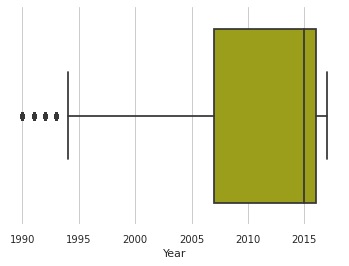

In [51]:
sns.set_style("whitegrid")
sns.boxplot(x=df['Year'],color="#AEB404");

# saving the plot
plt.savefig("Detecting outliers-1.pdf")

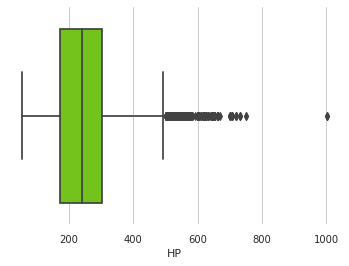

In [52]:
sns.set_style("whitegrid")
sns.boxplot(x=df['HP'],color="#74DF00");

# saving the plot
plt.savefig('Detecting outliers-2.pdf')

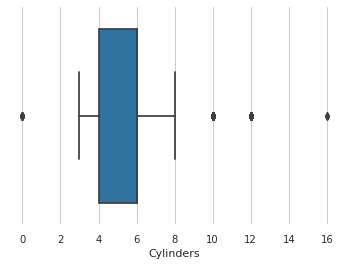

In [53]:
sns.set_style("whitegrid")
sns.boxplot(x=df['Cylinders']);

# saving the plot
plt.savefig('Detecting outliers-3.pdf')

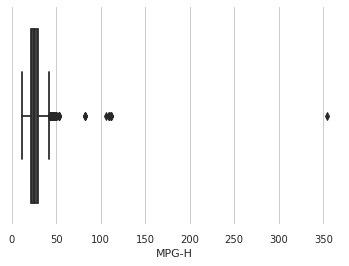

In [54]:
sns.set_style("whitegrid")
sns.boxplot(x=df['MPG-H'],color="#424242");

# saving the plot
plt.savefig('Detecting outliers-4.pdf')

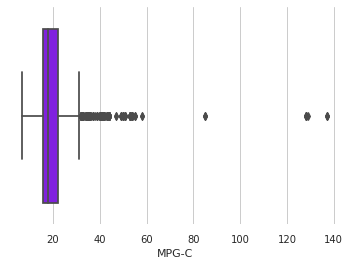

In [55]:
sns.set_style("whitegrid")
sns.boxplot(x=df['MPG-C'],color="#8000FF");

# saving the plot
plt.savefig('Detecting outliers-5.pdf')

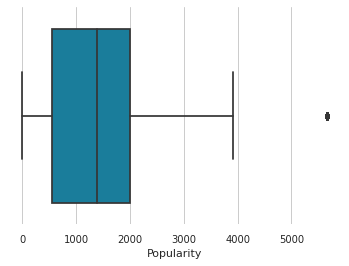

In [56]:
sns.set_style("whitegrid")
sns.boxplot(x=df['Popularity'],color="#0489B1");

# saving the plot
plt.savefig('Detecting outliers-6.pdf')

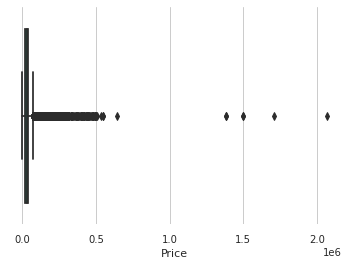

In [57]:
sns.set_style("whitegrid")
sns.boxplot(x=df['Price'],color="#088A68");

# saving the plot
plt.savefig('Detecting outliers-7.pdf')

In [58]:
Q1=df.quantile(0.25)                                                            #Whisker 1
Q3=df.quantile(0.75)                                                            #whisker 2
IQR=Q3-Q1                                                                       #interquartile range here
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21491.25
dtype: float64


In [59]:
df=df[~((df<(Q1-1.5*IQR))| (df>(Q3+1.5*IQR))).any(axis=1)]                      #Standard formula but we can also use mean to 
df.shape

(8608, 14)

After removing and editing all the irrelevant data from data size (11193, 14) we came to data size of (8608, 14).

#**6. Most represented car brands**

In this section we will find top 10 car brands and calculate there average price of the car brand wise.

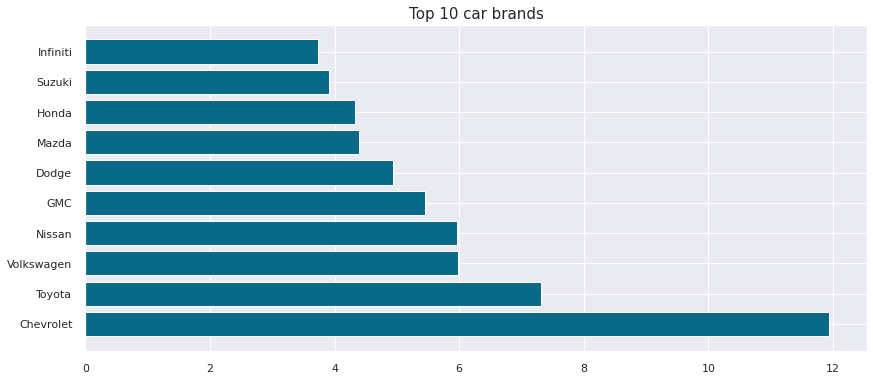

In [119]:
#Percentage of car brand
counts=df['Make'].value_counts()*100/sum(df['Make'].value_counts())

#Top 10car brands
popular_labels=counts.index[:10]

#Plot
plt.figure(figsize=(14,6))
plt.barh(popular_labels,width=counts[:10],color="#086A87")
plt.title('Top 10 car brands', fontsize="15")
plt.show();

We got are top 10 car brands and as we can see **Chevrolet** is the winner among among all the car brands, hence it is preferred by majority of people.

**6.1 Average price among the top car brands**

In [123]:
prices=df[['Make','Price']].loc[
                                (df['Make']=='Chevrolet') |
                                (df['Make']=='Toyota') |
                                (df['Make']=='Volkswagen') |
                                (df['Make']=='Nissan') |
                                (df['Make']=='GMC') |
                                (df['Make']=='Dodge') |
                                (df['Make']=='Mazda') | 
                                (df['Make']=='Honda') |
                                (df['Make']=='Suzuki') |
                                (df['Make']=='Infiniti')].groupby('Make').mean()
print(round(prices,2));                                                         #Printing average price upto 2 values

               Price
Make                
Chevrolet   28188.63
Dodge       26076.72
GMC         33261.40
Honda       27381.36
Infiniti    43127.82
Mazda       20495.82
Nissan      28352.54
Suzuki      18164.10
Toyota      29011.75
Volkswagen  29032.82


**6.2 Top 5 highest selling car**

In [141]:
df[df.Price.isin(df.Price.nlargest(5))].sort_values(['Model','Make','MPG-H','MPG-C','Popularity','Price'])

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price,price_group
2388,Porsche,Cayman,2015,premium unleaded (required),340.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,1715,75200,60-79K
2391,Porsche,Cayman,2016,premium unleaded (required),340.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,1715,75200,60-79K
3027,Chevrolet,Corvette,2017,premium unleaded (recommended),460.0,8.0,MANUAL,rear wheel drive,Compact,Coupe,25,16,1385,75195,60-79K
4292,Lotus,Exige,2009,premium unleaded (recommended),257.0,4.0,MANUAL,rear wheel drive,Compact,Coupe,26,20,613,74995,60-79K
10021,Cadillac,STS-V,2007,premium unleaded (required),469.0,8.0,AUTOMATIC,rear wheel drive,Large,Sedan,19,12,1624,75010,60-79K


This shows top 5 **highest price** selling car and their models details preffered by high profile income group peoples.

**6.3 Top 5 least popular cars**

In [153]:
df[df.Popularity.isin(df.Popularity.nsmallest(5))].sort_values(['Model','Make','MPG-H','MPG-C',"Popularity",'Price'])

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price,price_group
1291,Oldsmobile,Achieva,1998,regular unleaded,150.0,6.0,AUTOMATIC,front wheel drive,Midsize,Sedan,27,18,26,2000,<10k
1289,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,Midsize,Coupe,29,19,26,2000,<10k
1290,Oldsmobile,Achieva,1997,regular unleaded,150.0,4.0,UNKNOWN,front wheel drive,Midsize,Sedan,29,19,26,2000,<10k
1287,Oldsmobile,Achieva,1996,regular unleaded,150.0,4.0,MANUAL,front wheel drive,Midsize,Sedan,30,20,26,2000,<10k
1288,Oldsmobile,Achieva,1996,regular unleaded,150.0,4.0,MANUAL,front wheel drive,Midsize,Coupe,30,20,26,2000,<10k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9424,Oldsmobile,Silhouette,2003,regular unleaded,185.0,6.0,AUTOMATIC,front wheel drive,Midsize,Passenger Minivan,24,17,26,31690,20-39K
9428,Oldsmobile,Silhouette,2004,regular unleaded,185.0,6.0,AUTOMATIC,front wheel drive,Midsize,Passenger Minivan,24,17,26,32125,20-39K
9420,Oldsmobile,Silhouette,2002,regular unleaded,185.0,6.0,AUTOMATIC,front wheel drive,Midsize,Passenger Minivan,24,17,26,33400,20-39K
9421,Oldsmobile,Silhouette,2003,regular unleaded,185.0,6.0,AUTOMATIC,front wheel drive,Midsize,Passenger Minivan,24,17,26,33740,20-39K


This shows top 5 **lowest popular** selling car and their models details and hence these models can avoided for selling.

#**7. Correlation matrix** 

In [62]:
#Performing correlation
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330540,-0.094397,0.359829,0.323613,0.204453,0.591644
HP,0.330540,1.000000,0.741031,-0.465311,-0.563362,0.105691,0.743497
Cylinders,-0.094397,0.741031,1.000000,-0.697884,-0.750850,0.025803,0.392174
MPG-H,0.359829,-0.465311,-0.697884,1.000000,0.937936,0.080857,-0.127772
MPG-C,0.323613,-0.563362,-0.750850,0.937936,1.000000,0.070320,-0.202410
Popularity,0.204453,0.105691,0.025803,0.080857,0.070320,1.000000,0.116684
Price,0.591644,0.743497,0.392174,-0.127772,-0.202410,0.116684,1.000000


**Correlation & Anticorrelation**

From the above anlysis we obseve there is 


1.   High correlation between 

      *   Cylinders and HP
      *   Highway mpg and City mpg
      *   HP and Price



More the the cylinders present in car more will the horse power i.e. more power.

2.   Hight Anticorrelation between

      *   Cylinders and highway mpg

More the cylinders present more is the power which results in more fuel consumption hence less mileage.








#**8. Plotting different graphs & Performing EDA**

**8.1 Scatterplots**

Scatter plot is used to find the correlation between two variables. As from the previous result we see strong correlation between **Cylinders and HP**, **Highway mpg and City mpg** and **HP and Price** and also  too, so we plot the graph for them and then draw the trend line.

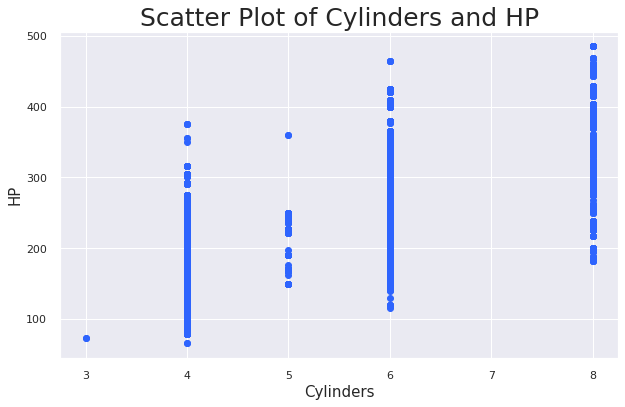

In [163]:
#Scatterplot between HP & Cylinders

fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(df['Cylinders'], df['HP'], color='#2E64FE')
sns.set()                                                                       #set background 'dark grid'
plt.title("Scatter Plot of Cylinders and HP", fontsize = 25)
ax.set_xlabel('Cylinders',fontsize= 15)
ax.set_ylabel('HP',fontsize= 15)
plt.show();

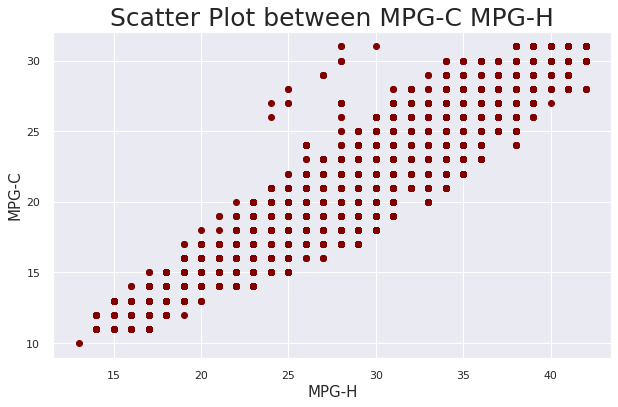

In [164]:
#Scatterplot between HP & Cylinders

fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(df['MPG-H'], df['MPG-C'], color='#800000')
plt.title("Scatter Plot between MPG-C MPG-H", fontsize = 25)
ax.set_xlabel('MPG-H',fontsize= 15)
ax.set_ylabel('MPG-C',fontsize= 15)
plt.show();

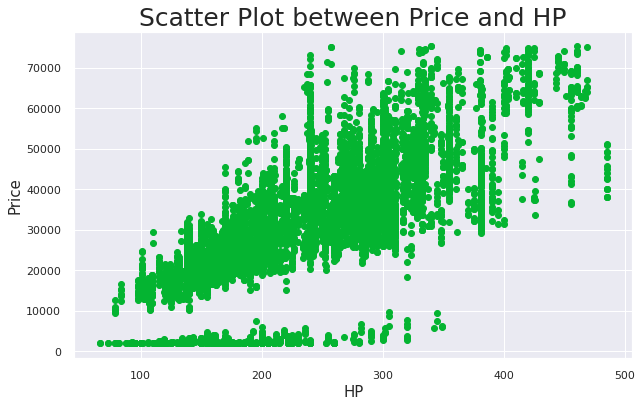

In [173]:
#Scatterplot between HP & Price

fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'],color='#04B431')
plt.title("Scatter Plot between Price and HP", fontsize = 25)
ax.set_xlabel('HP',fontsize= 15)
ax.set_ylabel('Price',fontsize= 15)
plt.show();

**8.2 Heat Map**

Heat Map is also preffered to find the correlation between two variables. Below graph shows the which features are most relative and dependent on each other. 

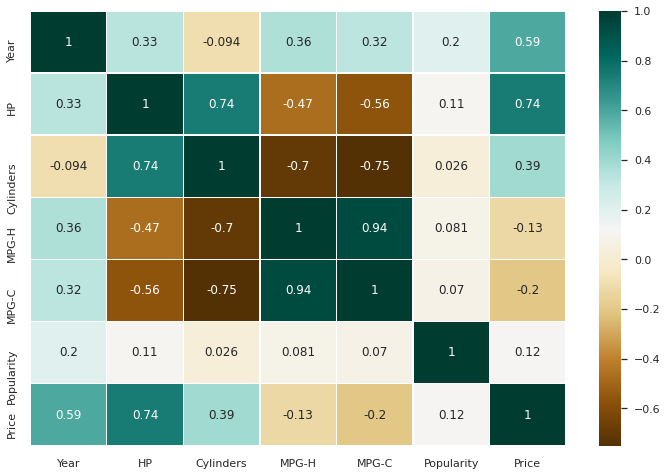

In [186]:
plt.figure(figsize=(12,8))
c=df.corr()
sns.heatmap(c,cmap="BrBG", annot=True, linewidths=0.5);

# saving the plot
plt.savefig('Heat Map.png')

Hence it looks Cylinders and HP, Highway mpg and City mpg, HP and Price are more dependnt on each other the we see Hight Anticorrelation between Cylinders and highway mpg. Just same as correlation matrix we studied before.

**8.3 Most sold car segment**

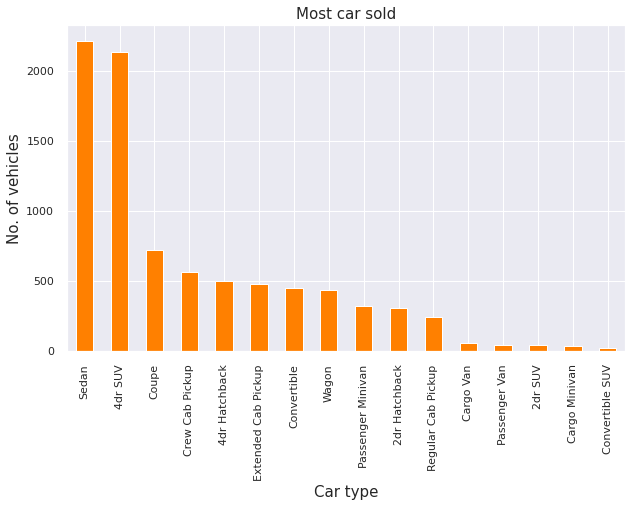

In [66]:
#Bar chart for car "Body" variable
df["Vehicle Style"].value_counts().plot.bar(figsize=(10,6),color="#FF8000")
sns.set()  
plt.title("Most car sold",fontsize= 15)
plt.xlabel("Car type",fontsize= 15)
plt.ylabel("No. of vehicles",fontsize= 15);

# saving the plot
plt.savefig('Most car sold.png')

From the chart we can see **Sedan** cars were the most sold cards followed by 4dr SUV.

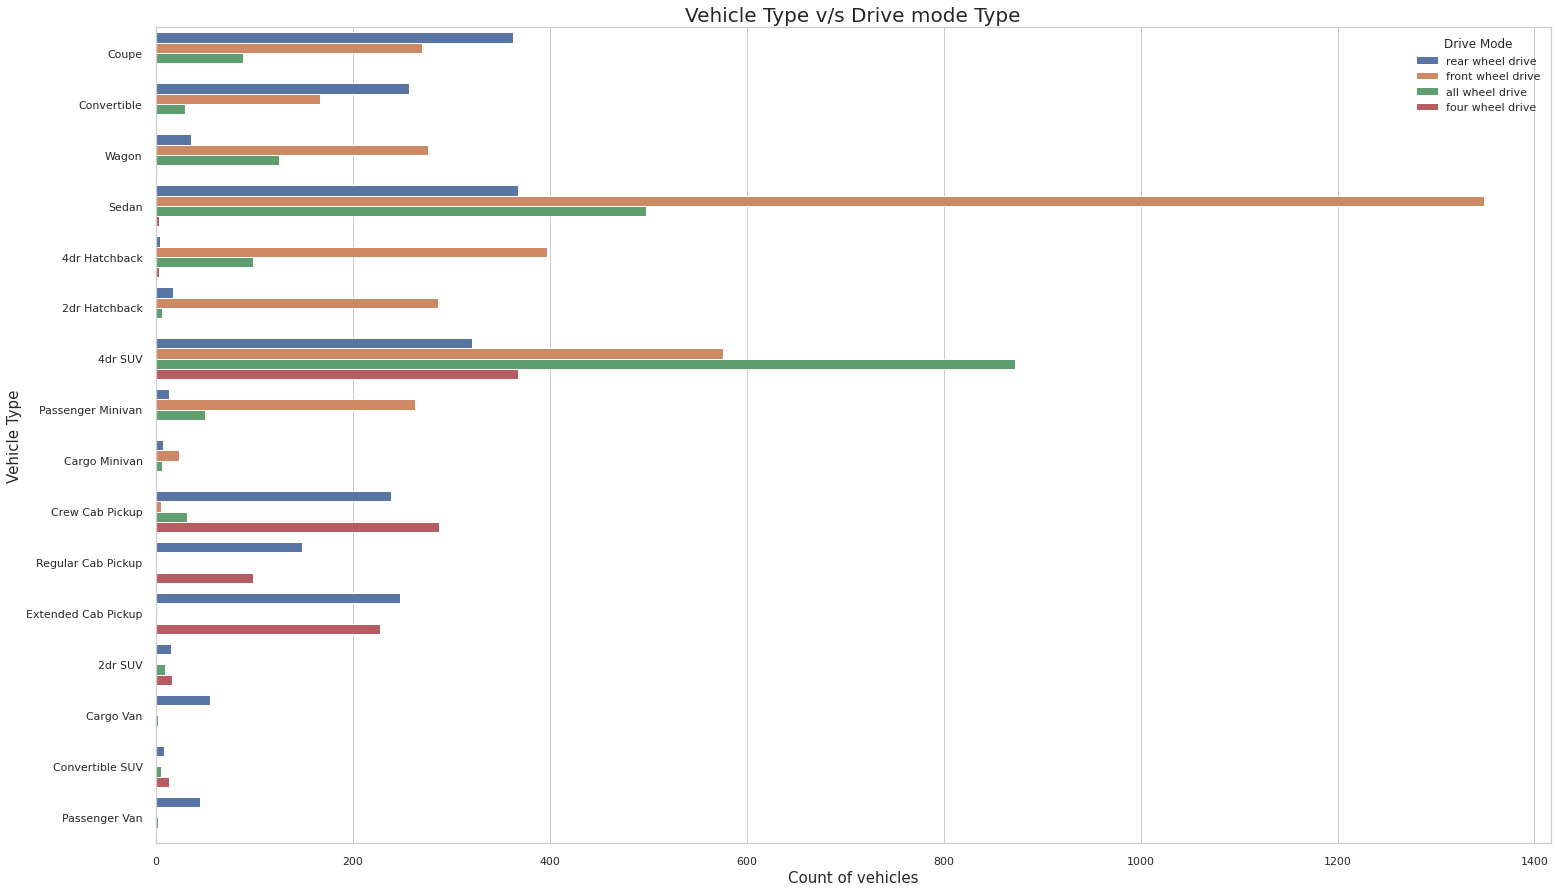

In [219]:
#Vehicle style type and Drive type analysis
sns.set_style("whitegrid")
plt.figure(figsize=(25,15))
sns.countplot(y="Vehicle Style", data=df, hue="Drive Mode")
plt.title("Vehicle Type v/s Drive mode Type", fontsize="20")
plt.ylabel("Vehicle Type",fontsize= 15)
plt.xlabel("Count of vehicles",fontsize= 15)
plt.show();

For the deeper understanding we found that **front wheel drive in sedan type** followed by **all wheel drive in 4dr SUV** are mostly preferred by people.

**8.4 Forming new group "price_group"**

In [215]:
#Create a new group "price_group" and assign the value based on the car price

df["price_group"]=pd.cut(df["Price"],[0,10000,20000,40000,60000,80000,100000,500000],
                          labels=["<10k","10-19K","20-39K","40-59K","60-79K","80-99K",">100k"], include_lowest=True)
df["price_group"]=df["price_group"].astype(object)

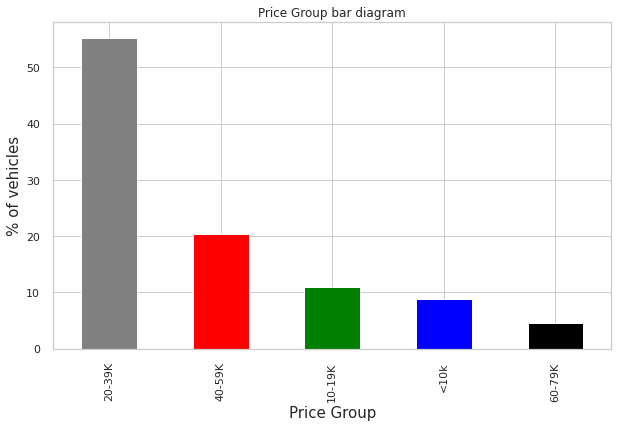

In [218]:
(df["price_group"].value_counts()/len(df)*100).plot.bar(figsize=(10,6),color=('grey', 'red', 'green', 'blue', 'black'))
sns.set_style("whitegrid")
plt.title("Price Group bar diagram")
plt.ylabel("% of vehicles",fontsize= 15)
plt.xlabel("Price Group",fontsize= 15);

# saving the plot
plt.savefig('Price group.png')

Hence, we divided price among 5 groups and we can see **more than 50% of cars are sold between price range of "20-39k US dollars."** and least sold are for the price range 60-79k.

**8.5 Multivariate Graphs**

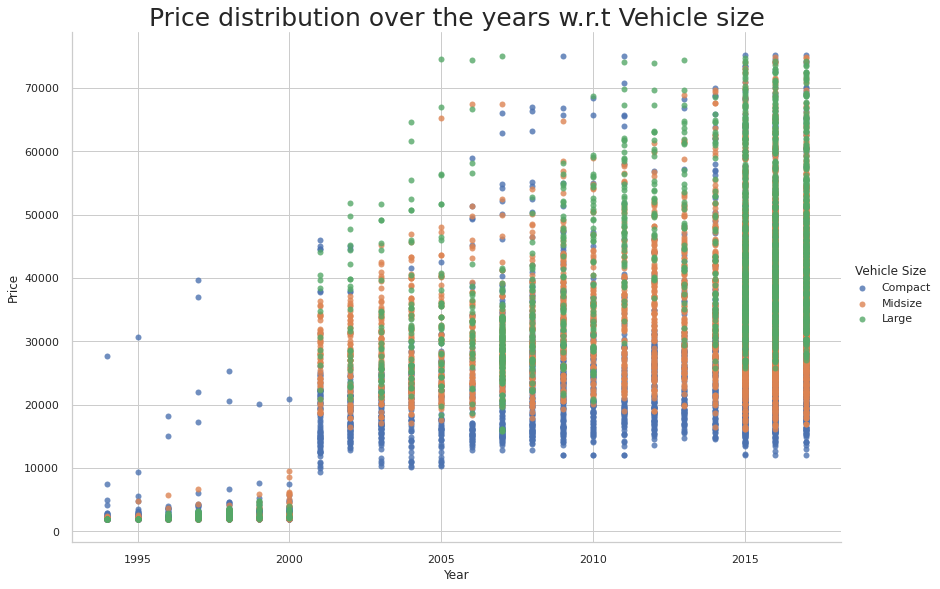

In [305]:
sns.lmplot('Year','Price', df, fit_reg=False, hue='Vehicle Size', height=8,aspect=1.5)
sns.set_style("whitegrid")
plt.title("Price distribution over the years w.r.t Vehicle size", fontsize="25")
plt.show();

The above multivariate graphs shows the Price distribution over the years w.r.t Vehicle size. As the years increase, people bought high price range car or it might means as the year increase rate of cars also increased, but the important aspect which needs to be notices is that, in any time frame **people prefer buying "Large" vehicle size cars**.

**8.6  Pair Plot**

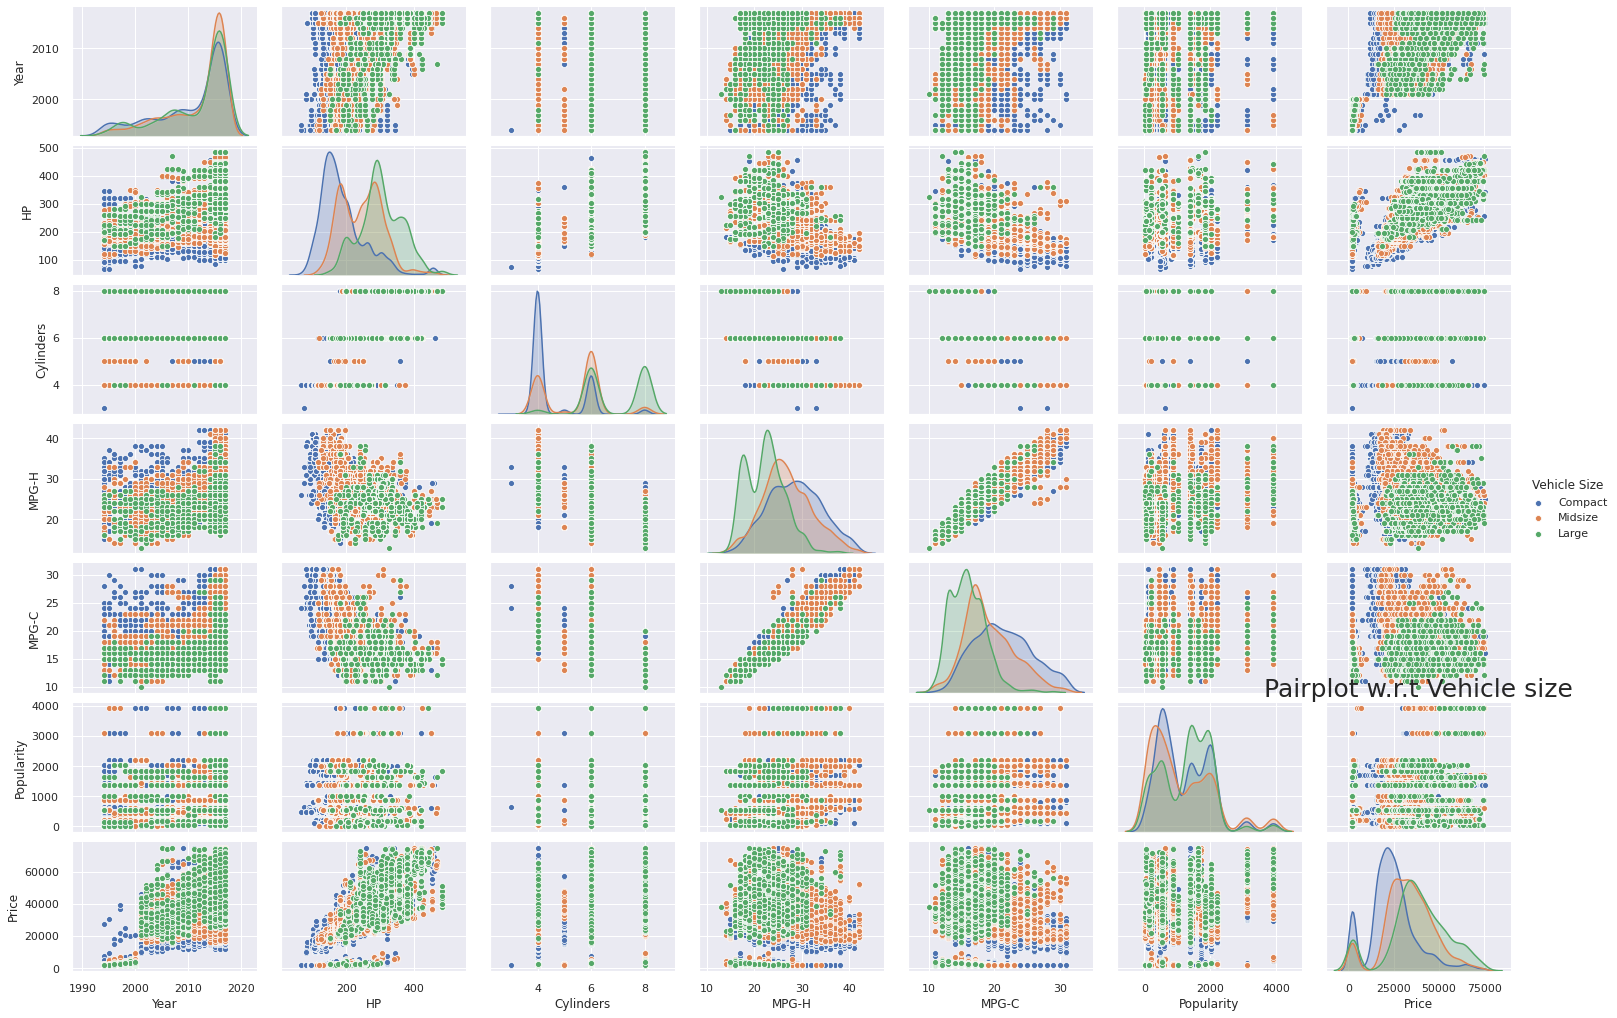

In [326]:
sns.set_color_codes()
sns.set()  
sns.pairplot(df, hue='Vehicle Size', height=2, aspect=1.5)
plt.title("Pairplot w.r.t Vehicle size", fontsize="25")
plt.show();

This pairplot gives the observations which already have been referred from other graphs above, such as:

*     Most prefered car size over the years is "Large"
*     Large car give 0-30MPG-C, MPG-H and midsize gives above 30 

#**9. Basic Machine learning model**

In [327]:
x=df[["Year","HP","Cylinders","MPG-H","MPG-H","Popularity"]]
y=df["Price"].values

In [328]:
#Feature scaling, it will help in faster optimizing
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y.reshape(-1,1))

**9.1 Splitting the data set**

We split the data set into 80-20.

In [329]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**9.2 ML with linear regression**

Building a machine learning model with "Price" as the target variable

In [330]:
#Fitting Multiple Linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train);

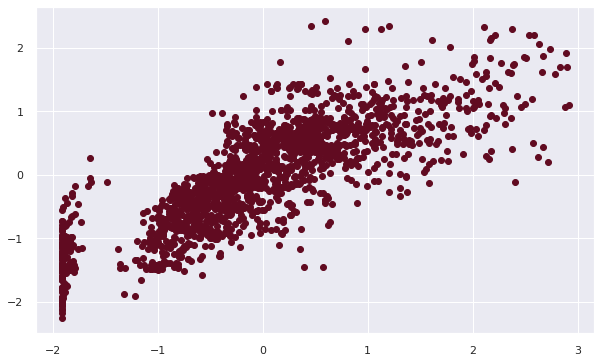

In [331]:
#predicting the test set results
sns.set()
plt.figure(figsize=(10,6))
y_pred=regressor.predict(x_test)
plt.scatter(y_test,y_pred,color="#610B21");

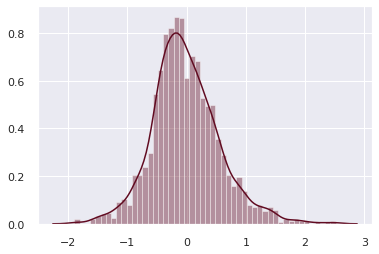

In [332]:
sns.set()
sns.distplot((y_test-y_pred),bins=50,color="#610B21");

In [333]:
from sklearn import metrics
print("Mean Absolute error=", metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error=", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score=", metrics.r2_score(y_test,y_pred))

Mean Absolute error= 0.43709374385729616
Root Mean Squared Error= 0.5723772684451011
R2 Score= 0.6549245463576465


#**10. Spot checking algorithms**

**10.1 Polynomial Regression**

In [334]:
#Fitting Polynomial Regression to the data set
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly,y_train)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y_train);

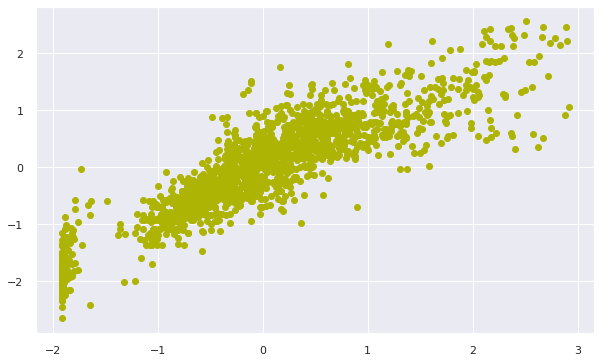

In [335]:
#Prediciting th new result with Polynnomial Regression
plt.figure(figsize=(10,6))
y_pred=lin_reg2.predict(poly_reg.fit_transform(x_test))
plt.scatter(y_test,y_pred,color="#AEB404")
plt.show()

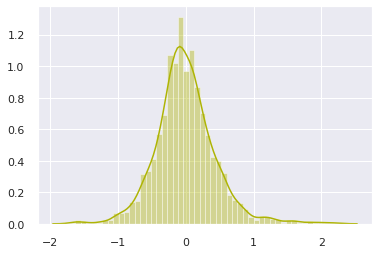

In [336]:
sns.distplot((y_test-y_pred),bins=50,color="#AEB404");

In [337]:
from sklearn import metrics
print("Mean Absolute error=", metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error=", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score=", metrics.r2_score(y_test,y_pred))

Mean Absolute error= 0.32493710566520323
Root Mean Squared Error= 0.4433160620042632
R2 Score= 0.7929971877820123


**10.2 SVR regression**

In [338]:
#Fitting SVR to the dataset
from sklearn.svm import SVR
regressor=SVR(kernel="rbf")
regressor.fit(x_train,y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


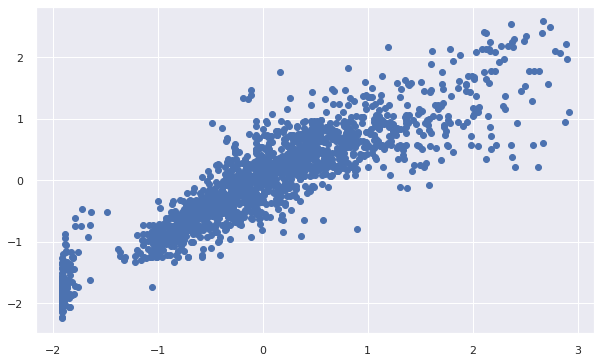

In [339]:
#Predicting the new result
plt.figure(figsize=(10,6))
y_pred=regressor.predict(x_test)
plt.scatter(y_test,y_pred);

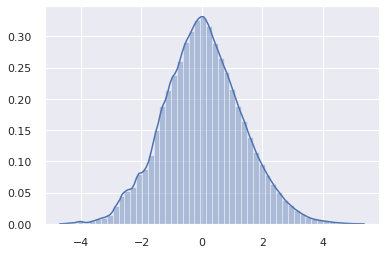

In [340]:
sns.distplot((y_test-y_pred),bins=50);

In [341]:
from sklearn import metrics
print("Mean Absolute error=", metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error=", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score=", metrics.r2_score(y_test,y_pred))

Mean Absolute error= 0.30254094011685384
Root Mean Squared Error= 0.4288446684923326
R2 Score= 0.8062912036783768


here we get more accurate result, but not too accurate.

**10.3 Random Forest**

In [342]:
#Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300,random_state=0)
regressor.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

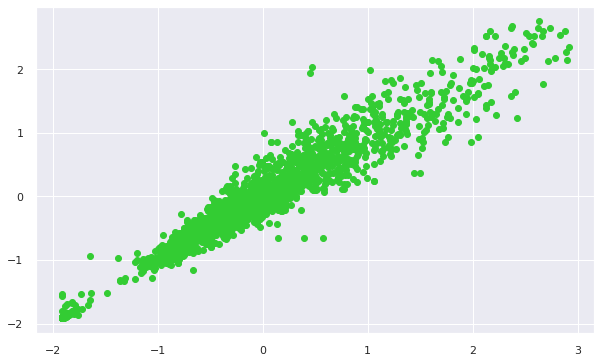

In [343]:
#Predicting the new result
plt.figure(figsize=(10,6),)
y_pred=regressor.predict(x_test)
plt.scatter(y_test,y_pred,color="#33cc33");

# saving the plot
plt.savefig('Random forest.png')

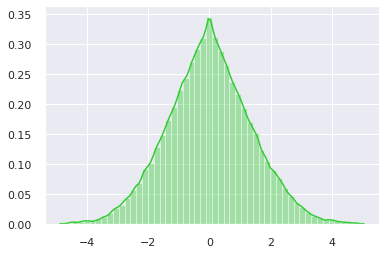

In [344]:
sns.distplot((y_test-y_pred),bins=50,color="#33cc33");
# saving the plot
plt.savefig('Random forest-1.png')

In [345]:
from sklearn import metrics
print("Mean Absolute error=", metrics.mean_absolute_error(y_test,y_pred))
print("Root Mean Squared Error=", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("R2 Score=", metrics.r2_score(y_test,y_pred))

Mean Absolute error= 0.1811601275104886
Root Mean Squared Error= 0.2577655380015529
R2 Score= 0.9300159583540415


##**Downloading the output graphs we made**

In [346]:
#Downloading the saved figure

files.download('Detecting outliers-1.pdf')
'''
files.download('Detecting outliers-2.pdf')
files.download('Detecting outliers-3.pdf')
files.download('Detecting outliers-4.pdf')
files.download('Detecting outliers-5.pdf')
files.download('Detecting outliers-6.pdf')
files.download('Detecting outliers-7.pdf')

files.download('Heat Map.png')

files.download('Most car sold.png')

files.download('Price group.png')

files.download('Random forest.png')
files.download('Random forest-1.png')
'''

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

"\nfiles.download('Detecting outliers-2.pdf')\nfiles.download('Detecting outliers-3.pdf')\nfiles.download('Detecting outliers-4.pdf')\nfiles.download('Detecting outliers-5.pdf')\nfiles.download('Detecting outliers-6.pdf')\nfiles.download('Detecting outliers-7.pdf')\n\nfiles.download('Heat Map.png')\n\nfiles.download('Most car sold.png')\n\nfiles.download('Price group.png')\n\nfiles.download('Random forest.png')\nfiles.download('Random forest-1.png')\n"

##**Conclusion**

Errors are almost normallize, R2 value has increased thus, random forest is better than other algorithms.*, these more learner and thus it outperform. 